In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import plistlib
import requests

In [3]:
#load dataset 'tips'
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

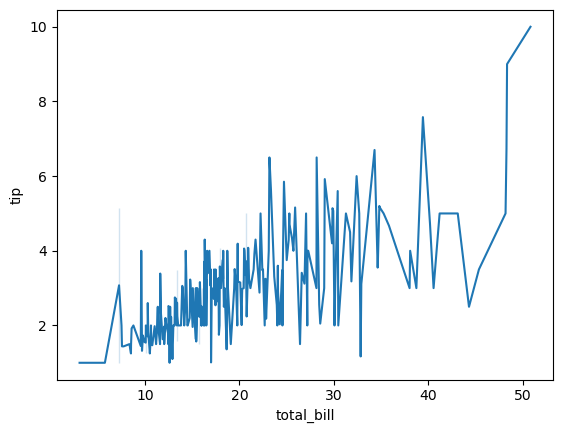

In [4]:
#make a simple line plot of tip amount vs total bill
sns.lineplot(data=tips,       # choose our dataset
           x='total_bill',  # define our x variable
           y='tip')         # define our y variable

<Axes: xlabel='total_bill', ylabel='tip'>

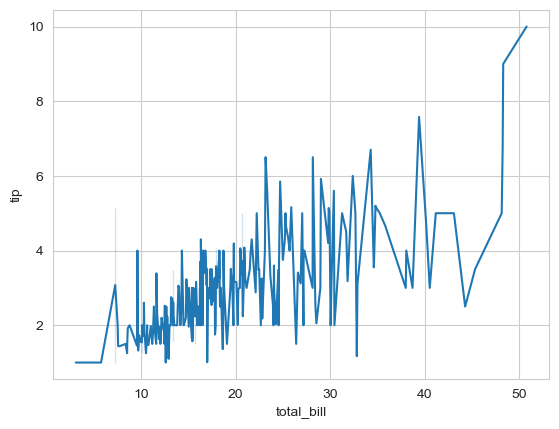

In [5]:
#apply whitegrid style to the plot
sns.set_style('whitegrid')

sns.lineplot(data=tips,       
           x='total_bill',  
           y='tip')  

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

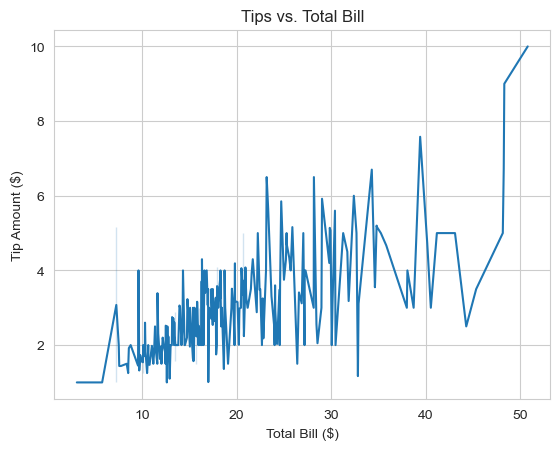

In [6]:
#Add title and axis labels
tipgraph = sns.lineplot(data=tips,
                        x='total_bill',
                        y='tip')
tipgraph.set(title='Tips vs. Total Bill', 
            xlabel='Total Bill ($)', 
            ylabel='Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

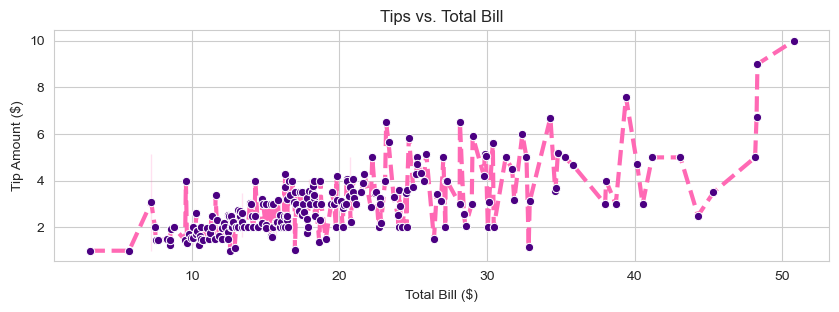

In [7]:
#subplots function to change figure size and modify aesthetic elements
fig = plt.subplots(figsize=(10, 3))

tipgraph = sns.lineplot(data=tips,
                      x='total_bill',
                      y='tip',
                      color = 'hotpink',
                      linestyle = '--',
                      linewidth = 3,
                      marker = 'o',
                      markerfacecolor = 'indigo')
tipgraph.set(title = 'Tips vs. Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

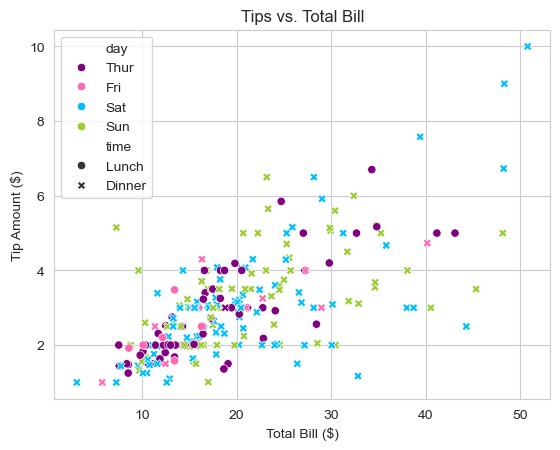

In [8]:
#Add multiple variables

tipgraph = sns.scatterplot(data=tips, 
                           x='total_bill',
                           y='tip', 
                           style = 'time', 
                           hue ='day', 
                           palette = ['purple','hotpink', 'deepskyblue','yellowgreen'])
                                      
tipgraph.set(title='Tips vs. Total Bill',
            xlabel='Total Bill ($)',
            ylabel='Tip Amount ($)')

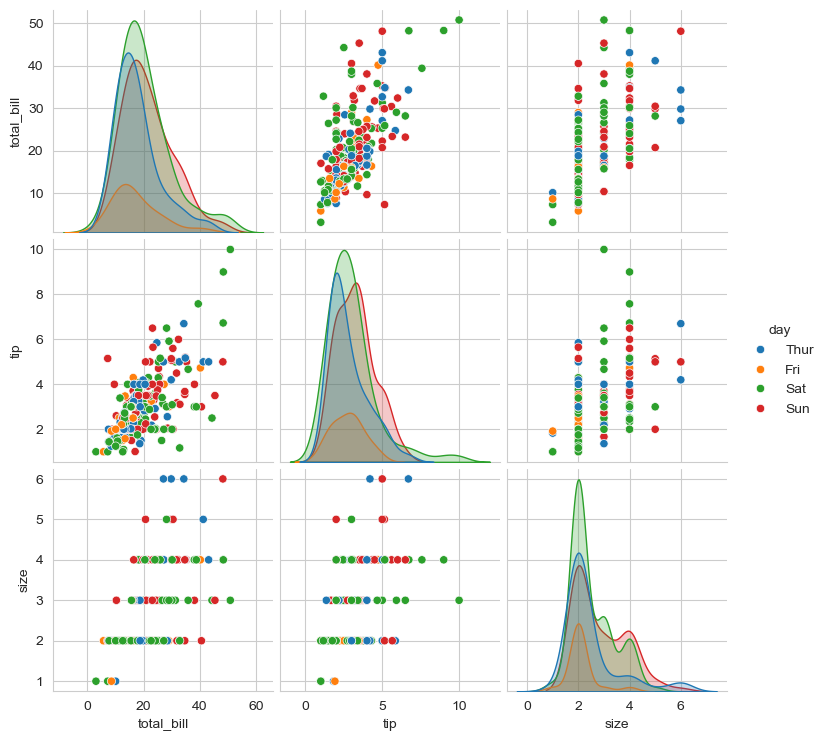

In [9]:
#Pairplot
sns.pairplot(
      data = tips,
      hue = 'day')

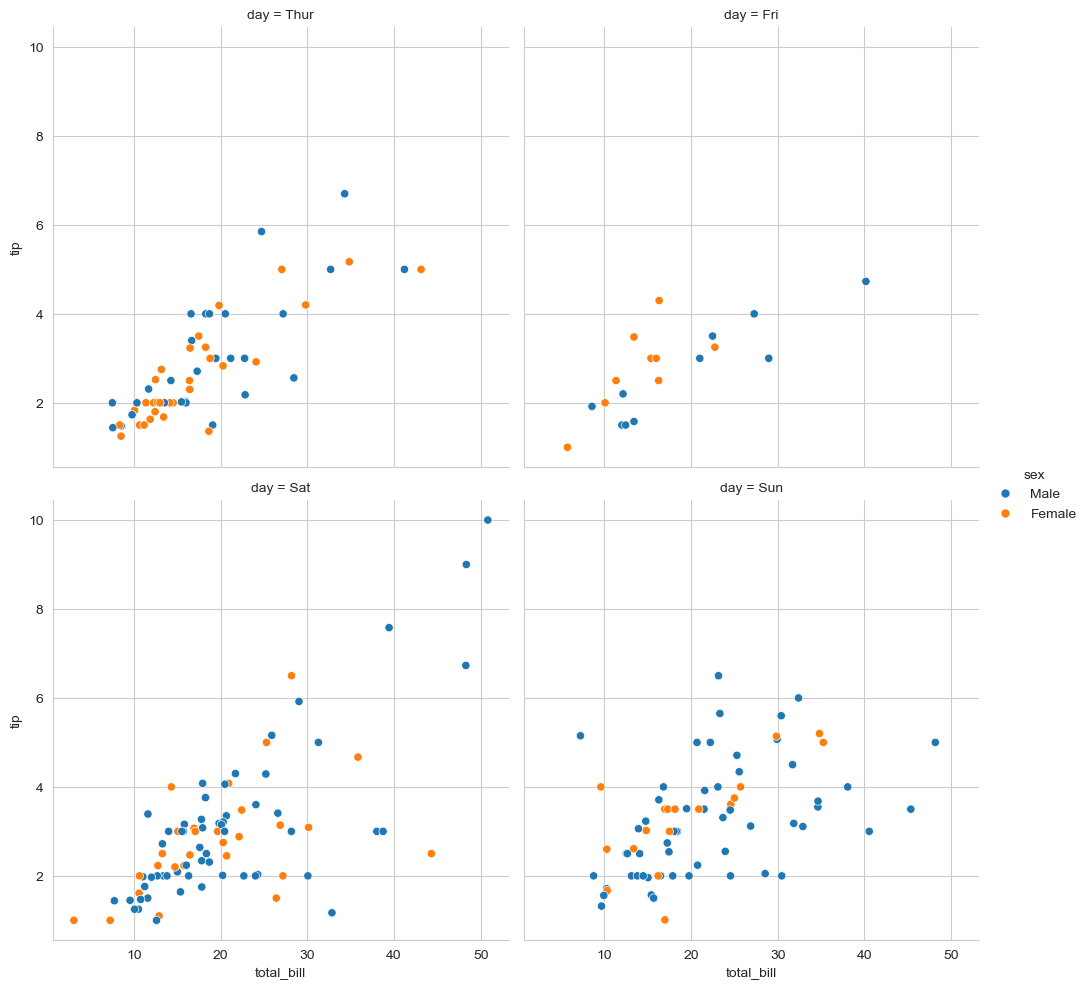

In [10]:

#replot
daysplot = sns.relplot(
            data=tips,
            x="total_bill",
            y="tip",
            hue="sex",
            col="day",
            kind="scatter",
            col_wrap=2)

In [ ]:
#Plotly
import plotly.graph_objects as go     # 'go' is 'graph objects’

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])


In [ ]:
#Making barplot with plotly (syntax different from matplot and seaborn)
graph = go.Figure() #make figure object

#choose plot type and include the variables to use
graph.add_trace(go.Bar(x=x1, y=y1)) 

graph.update_layout(title = "Pirate Scores",
                    xaxis_title = "Pirates",
                    yaxis_title = "Score")

In [15]:
#scatter plot with plotly
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers',    # we want points for a scatter plot
    marker=dict(
        size=15,                            # point size
        color='hotpink',                    # point colour
        opacity=1,                          # point transparency/alpha
        line=dict(width=5, color='purple')  # point outline
    )))
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

In [16]:
#Using wordcloud
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv", 
                 on_bad_lines= 'skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


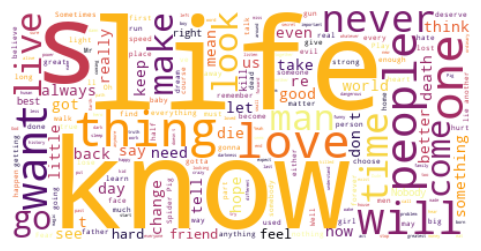

In [ ]:
#make a simple word cloud using the ‘quoteʼ variable
# join all the text from each row from the quote column into a string

text = " ".join(each for each in df.quote)

# generate our wordcloud image
wordcloud = WordCloud(background_color="white",
colormap = 'inferno').generate(text)

# use matplotlib syntax to put the image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud,                  
        interpolation='bilinear')   # this line helps smooth the image
ax.axis("off")
plt.show()

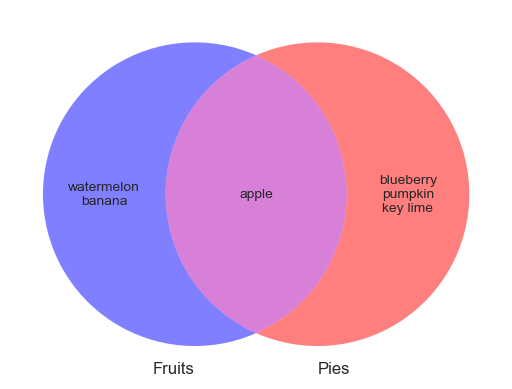

In [ ]:
#Making venn diagrams
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted #Import the necessary functions from the matplotlib_venn library

#define sets
A = set(["apple", "banana", "watermelon"]) # Set A contains fruits
B = set(["pumpkin", "blueberry", "apple", "key lime"]) ## Set B contains pies and overlapping items

# Create a Venn diagram using unweighted circles for the sets
# Set the labels, colors, and transparency of the diagram
diagram = venn2_unweighted([A, B],
                            set_labels = ('Fruits', 'Pies'), # Assign labels to the circles
                            set_colors = ("blue", "red"),  # Define colors for the circles
                            alpha = 0.5)                   # Set transparency level for the circles

#label individual points and modify venn diagram
# Modify the labels for each region in the Venn diagram "10" represents the region of set A only (elements in A but not in B)
diagram.get_label_by_id("10").set_text("\n".join(A - B)) #\n - display in new line # # A - B: Elements unique to set A
# "11" represents the intersection of sets A and B (elements common to both sets)
diagram.get_label_by_id("11").set_text("\n".join(A & B)) # A & B: Elements common to both sets
# "01" represents the region of set B only (elements in B but not in A)
diagram.get_label_by_id("01").set_text("\n".join(B - A))  # B - A: Elements unique to set B
plt.show()